## Importations

In [1]:
# Run Keras on CPU or GPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"        # -1 if CPU

In [2]:
# Importations
import sys
sys.path.append('utils')

from configtf2 import *
import CPutils_tf2
%matplotlib inline

import gradcam_utils_tf2

In [3]:
# Check CPU or GPU active
tf.test.gpu_device_name()

''

## Utils

In [4]:
# Generate Gradcam, GuidedBackprop, Guided GradCam for individual images
def GradCam_Outs(layers=[0,5,8,13,16,19], 
                 inputSize=(31,38),
                 channels=3,
                 save=False):
    # Loop
    for l in layers:
        print("Layer", l)
        gradcam, gb, guided_gradcam = gradcam_utils_tf2.compute_saliency(model, 
                                                                         guided_model, 
                                                                         imagePath, 
                                                                         layer_name='layer_' + str(l), 
                                                                         cls=-1,
                                                                         inputSize=inputSize,
                                                                         channels=channels,
                                                                         visualize=True, 
                                                                         save=save)

# Model
Load pre-trained model (weights)

In [5]:
# Model Path
PRE_TRAINED = os.path.join('..', 'pretrained_models')
DATA_PATH = os.path.join('..', 'data', 'dataset')

In [6]:
# Model from scratch and then load weights
from nets_tf2.firenet import FireNet
dims = (38, 31, 3)
model = FireNet.build_model(width=dims[0], height=dims[1], depth=dims[2], classes=2)

# Load weights
model.load_weights(os.path.join(PRE_TRAINED, 'MGCAM_3C.h5'))
for i, layer in enumerate(model.layers):
    layer._name  = 'layer_' + str(i)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_0 (SeparableConv2D)    (None, 31, 38, 32)        155       
_________________________________________________________________
layer_1 (Activation)         (None, 31, 38, 32)        0         
_________________________________________________________________
layer_2 (BatchNormalization) (None, 31, 38, 32)        128       
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 15, 19, 32)        0         
_________________________________________________________________
layer_4 (Dropout)            (None, 15, 19, 32)        0         
_________________________________________________________________
layer_5 (SeparableConv2D)    (None, 15, 19, 64)        2400      
_________________________________________________________________
layer_6 (Activation)         (None, 15, 19, 64)        0

In [7]:
# Construct pre-trained model
def model_constructor(PRE_TRAINED):
    # Model from scratch and then load weights
    from nets_tf2.firenet import FireNet
    dims = (38, 31, 3)
    model = FireNet.build_model(width=dims[0], height=dims[1], depth=dims[2], classes=2)

    # Load weights
    model.load_weights(os.path.join(PRE_TRAINED, 'ROS3C_model_noAug.h5'))
    for i, layer in enumerate(model.layers):
        layer._name  = 'layer_' + str(i)

    return model

In [8]:
# Model (pre-trained) 
H, W = 31, 38
model = gradcam_utils_tf2.build_model(model, model_constructor=model_constructor(PRE_TRAINED))
guided_model = gradcam_utils_tf2.build_guided_model(model)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_0 (SeparableConv2D)    (None, 31, 38, 32)        155       
_________________________________________________________________
layer_1 (Activation)         (None, 31, 38, 32)        0         
_________________________________________________________________
layer_2 (BatchNormalization) (None, 31, 38, 32)        128       
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 15, 19, 32)        0         
_________________________________________________________________
layer_4 (Dropout)            (None, 15, 19, 32)        0         
_________________________________________________________________
layer_5 (SeparableConv2D)    (None, 15, 19, 64)        2400      
_________________________________________________________________
layer_6 (Activation)         (None, 15, 19, 64)        0

#  Attention Maps
- Individual samples processing. 
- Given a png file with the corresponding number of channels for the pre-trained model, we obtain the GradCAM, Guided Backpropagation, and Guided GradCAM outputs for all the specified layers (id of the layer).

Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.8642288  0.13577123]
predictions: [[0.13577123 0.8642288 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.864
	no_fire        	(0)	with probability 0.136
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


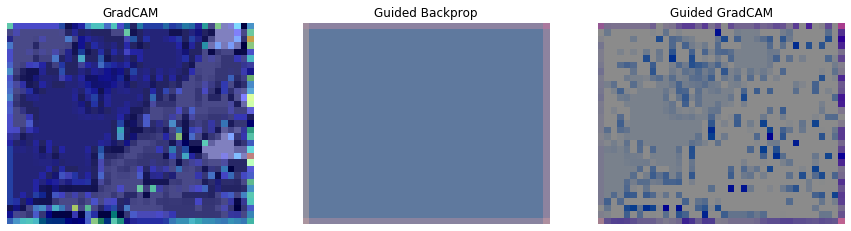

Layer 5
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.8642288  0.13577123]
predictions: [[0.13577123 0.8642288 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.864
	no_fire        	(0)	with probability 0.136
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


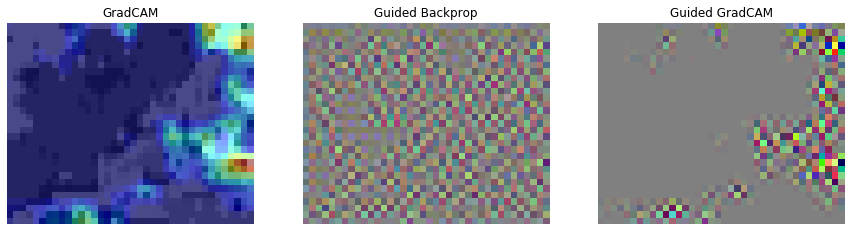

Layer 8
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.8642288  0.13577123]
predictions: [[0.13577123 0.8642288 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.864
	no_fire        	(0)	with probability 0.136
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


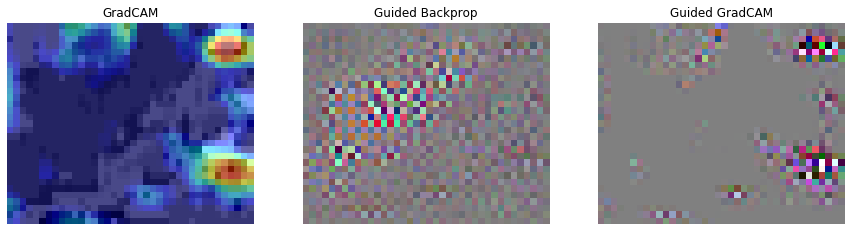

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.8642288  0.13577123]
predictions: [[0.13577123 0.8642288 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.864
	no_fire        	(0)	with probability 0.136
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


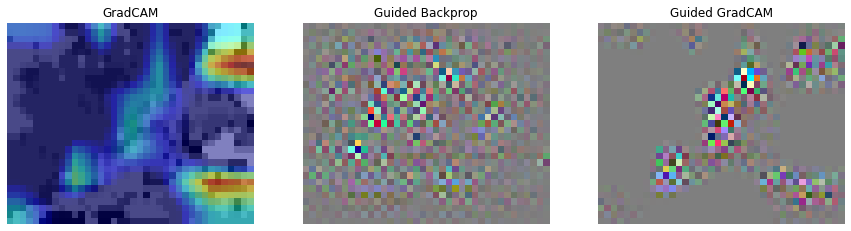

Layer 16
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.8642288  0.13577123]
predictions: [[0.13577123 0.8642288 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.864
	no_fire        	(0)	with probability 0.136
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


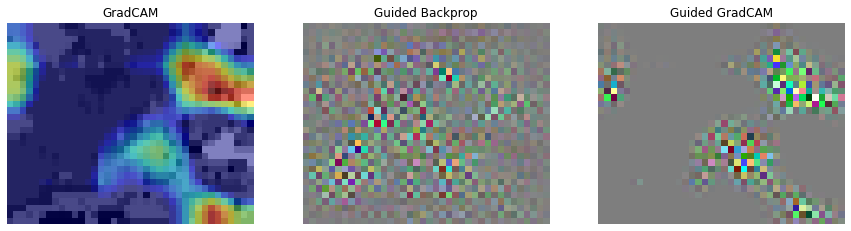

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.8642288  0.13577123]
predictions: [[0.13577123 0.8642288 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.864
	no_fire        	(0)	with probability 0.136
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


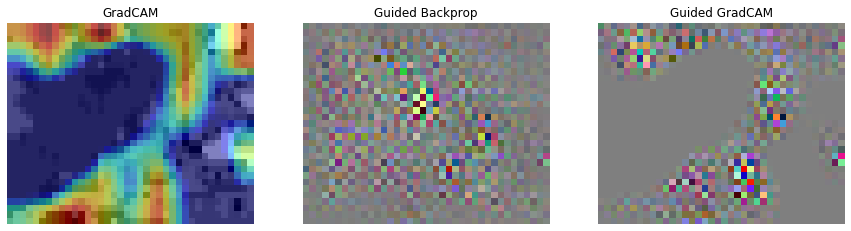

In [9]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '1_1.png')
GradCam_Outs(layers=[0,5,8,13,16,19], 
             inputSize=(31,38),
             channels=3)

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.74414796 0.255852  ]
predictions: [[0.74414796 0.255852  ]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.744
	fire           	(1)	with probability 0.256
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


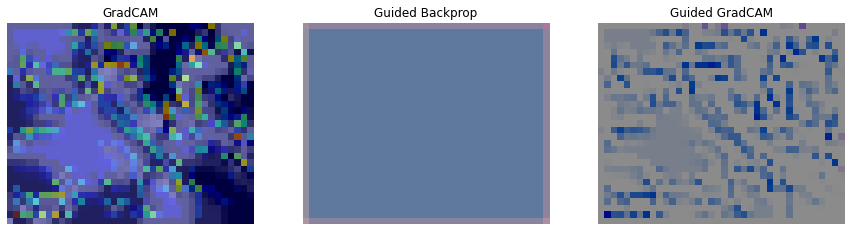

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 5
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.74414796 0.255852  ]
predictions: [[0.74414796 0.255852  ]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.744
	fire           	(1)	with probability 0.256
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


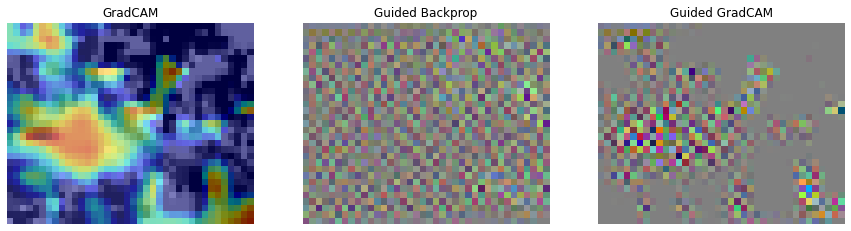

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 8
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.74414796 0.255852  ]
predictions: [[0.74414796 0.255852  ]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.744
	fire           	(1)	with probability 0.256
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


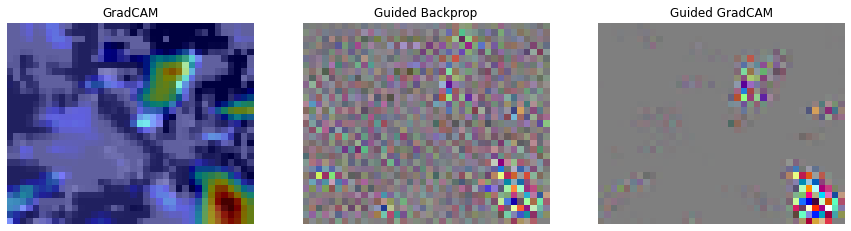

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.74414796 0.255852  ]
predictions: [[0.74414796 0.255852  ]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.744
	fire           	(1)	with probability 0.256
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


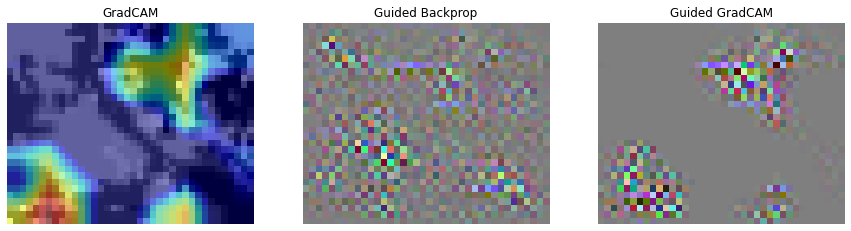

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 16
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.74414796 0.255852  ]
predictions: [[0.74414796 0.255852  ]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.744
	fire           	(1)	with probability 0.256
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


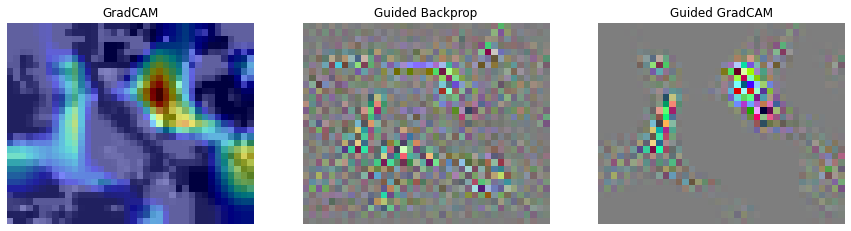

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.74414796 0.255852  ]
predictions: [[0.74414796 0.255852  ]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.744
	fire           	(1)	with probability 0.256
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


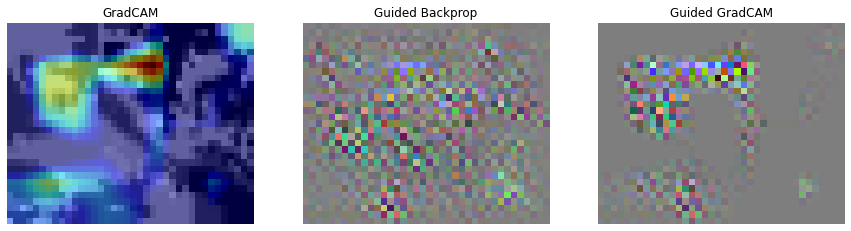

In [11]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '0_2.png')
GradCam_Outs(layers=[0,5,8,13,16,19], 
             inputSize=(31,38),
             channels=3)

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9981384  0.00186158]
predictions: [[0.9981384  0.00186158]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.998
	fire           	(1)	with probability 0.002
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


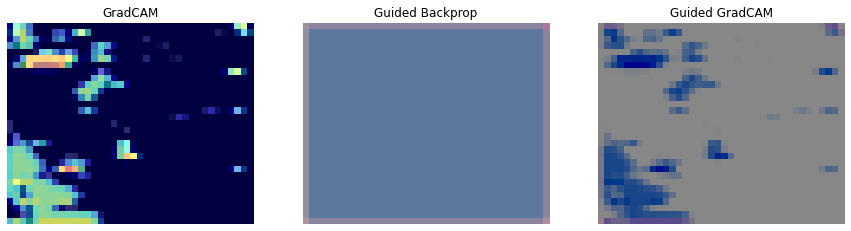

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 5
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9981384  0.00186158]
predictions: [[0.9981384  0.00186158]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.998
	fire           	(1)	with probability 0.002
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


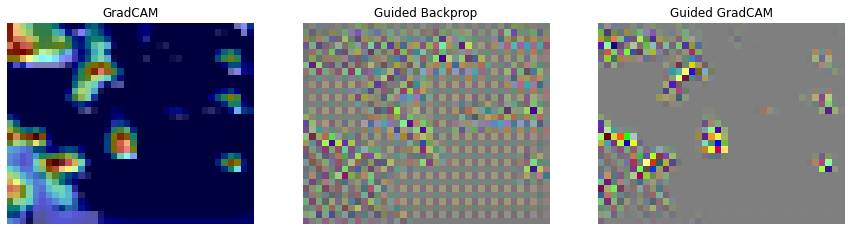

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 8
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9981384  0.00186158]
predictions: [[0.9981384  0.00186158]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.998
	fire           	(1)	with probability 0.002
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


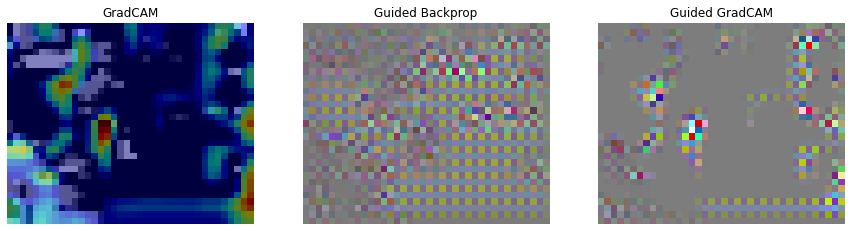

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9981384  0.00186158]
predictions: [[0.9981384  0.00186158]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.998
	fire           	(1)	with probability 0.002
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


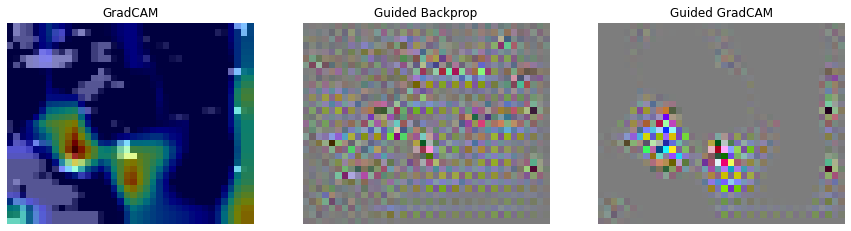

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 16
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9981384  0.00186158]
predictions: [[0.9981384  0.00186158]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.998
	fire           	(1)	with probability 0.002
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


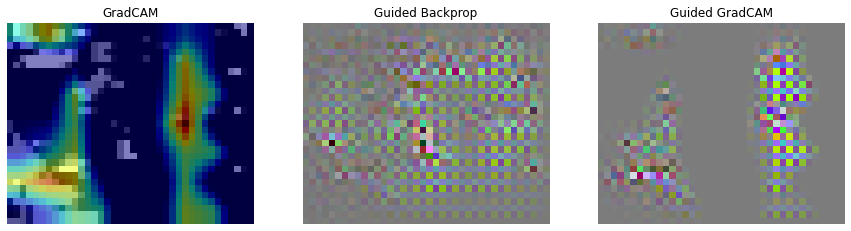

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9981384  0.00186158]
predictions: [[0.9981384  0.00186158]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.998
	fire           	(1)	with probability 0.002
Explanation for 'no_fire'


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


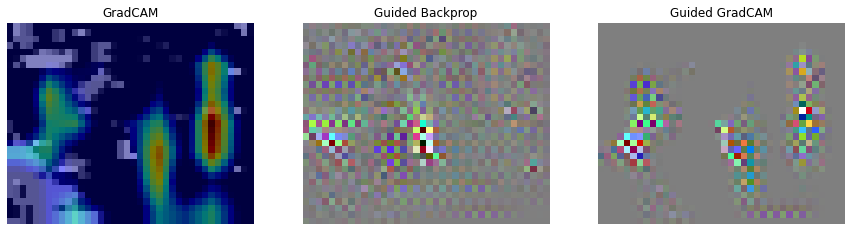

In [12]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '0_84.png')
GradCam_Outs(layers=[0,5,8,13,16,19], 
             inputSize=(31,38),
             channels=3)

Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.968734   0.03126602]
predictions: [[0.03126602 0.968734  ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.969
	no_fire        	(0)	with probability 0.031
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


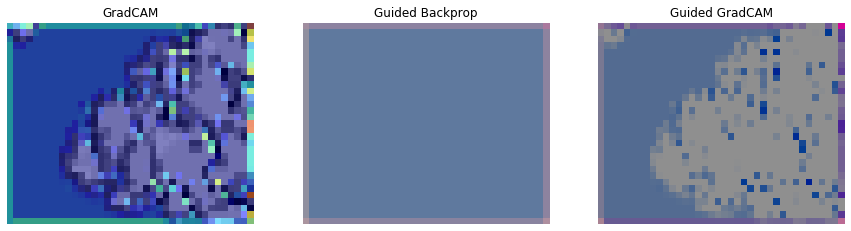

Layer 5
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.968734   0.03126602]
predictions: [[0.03126602 0.968734  ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.969
	no_fire        	(0)	with probability 0.031
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


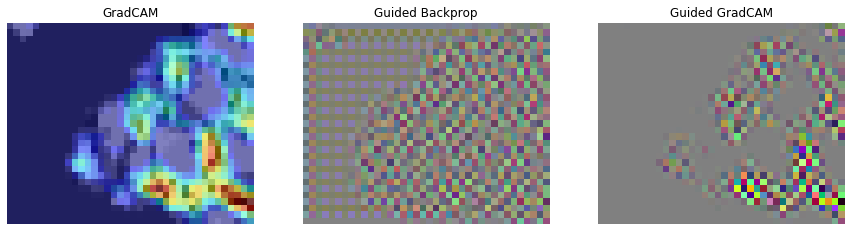

Layer 8
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.968734   0.03126602]
predictions: [[0.03126602 0.968734  ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.969
	no_fire        	(0)	with probability 0.031
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


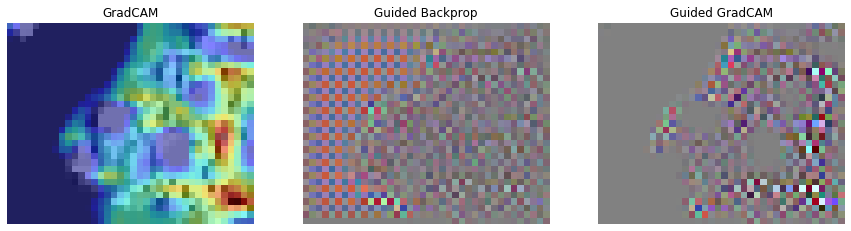

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.968734   0.03126602]
predictions: [[0.03126602 0.968734  ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.969
	no_fire        	(0)	with probability 0.031
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


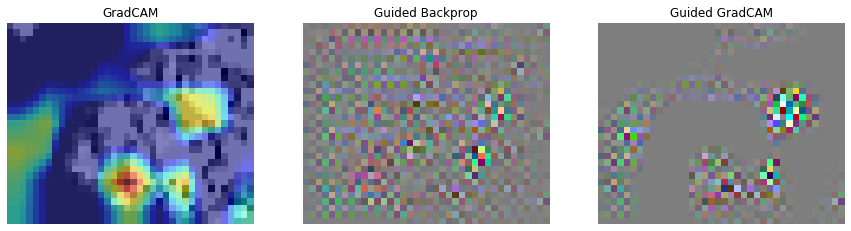

Layer 16
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.968734   0.03126602]
predictions: [[0.03126602 0.968734  ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.969
	no_fire        	(0)	with probability 0.031
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


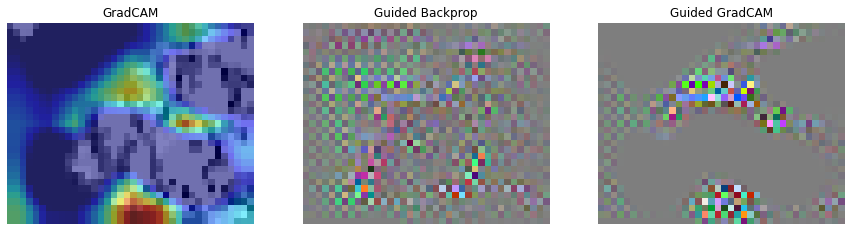

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.968734   0.03126602]
predictions: [[0.03126602 0.968734  ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.969
	no_fire        	(0)	with probability 0.031
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


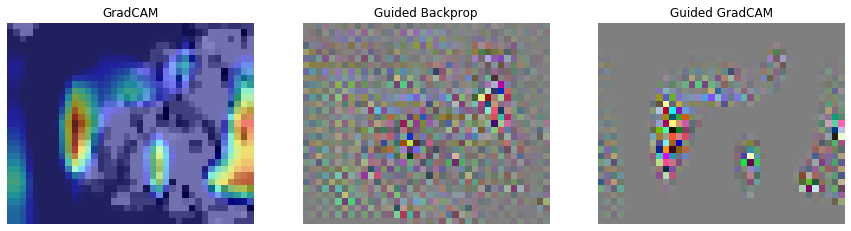

In [10]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '1_13259.png')
GradCam_Outs(layers=[0,5,8,13,16,19], 
             inputSize=(31,38),
             channels=3)

/home/cris/envs/mobility/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
  0%|          | 0/1 [00:00<?, ?it/s]

Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736622]
predictions: [[0.00736622 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


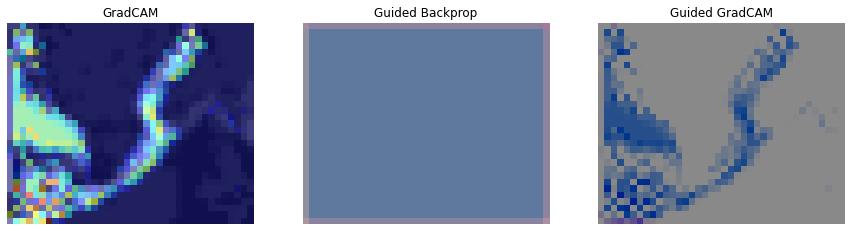

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 5
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736622]
predictions: [[0.00736622 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


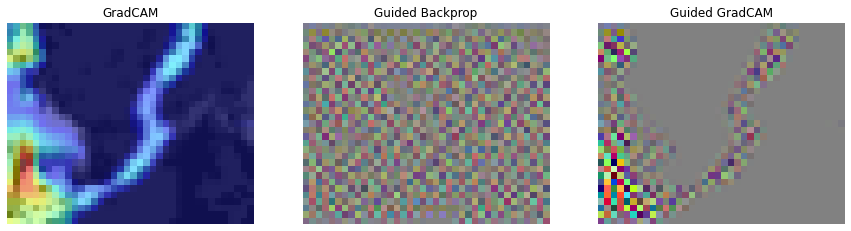

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 8
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736622]
predictions: [[0.00736622 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


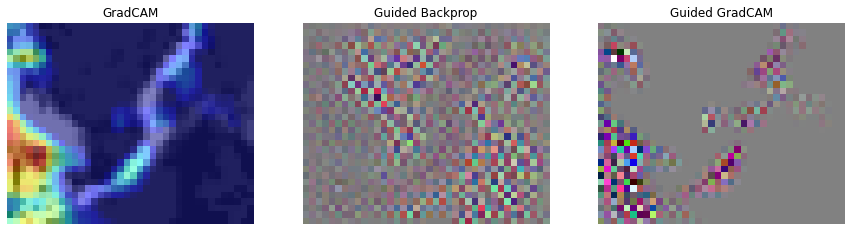

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736622]
predictions: [[0.00736622 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


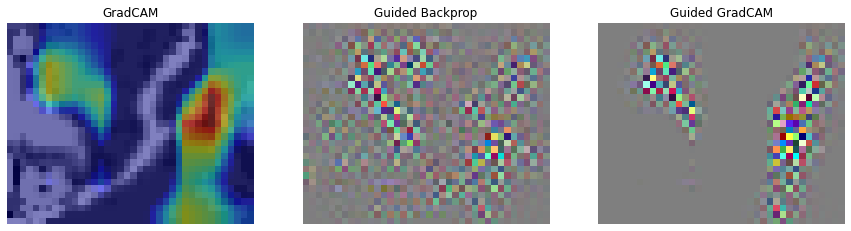

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 16
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736622]
predictions: [[0.00736622 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


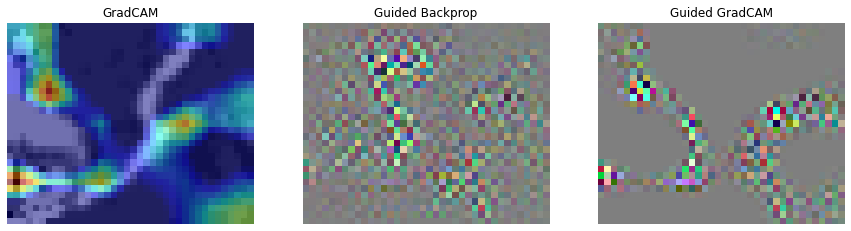

  0%|          | 0/1 [00:00<?, ?it/s]

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736622]
predictions: [[0.00736622 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'


100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


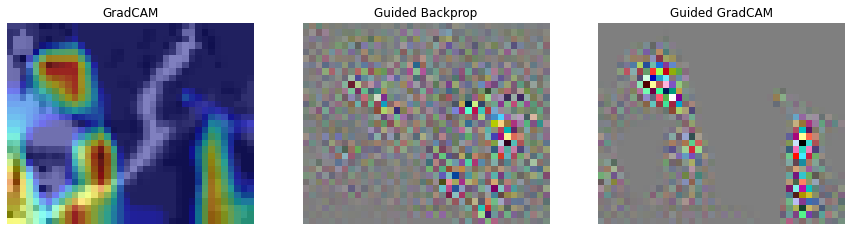

In [10]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '1_11212.png')
GradCam_Outs(layers=[0,5,8,13,16,19], 
             inputSize=(31,38),
             save=False,
             channels=3)

  0%|                                                                          | 0/1 [00:00<?, ?it/s]

Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.93531674 0.06468329]
predictions: [[0.93531674 0.06468329]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.935
	fire           	(1)	with probability 0.065
Explanation for 'no_fire'


100%|██████████████████████████████████████████████████████████████████| 1/1 [00:23<00:00, 23.08s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


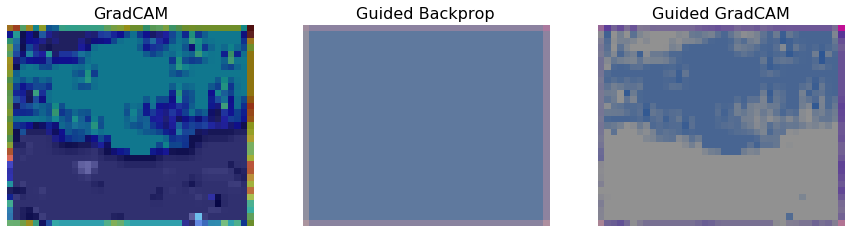

  0%|                                                                          | 0/1 [00:00<?, ?it/s]

Layer 5
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.93531674 0.06468329]
predictions: [[0.93531674 0.06468329]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.935
	fire           	(1)	with probability 0.065
Explanation for 'no_fire'


100%|██████████████████████████████████████████████████████████████████| 1/1 [00:24<00:00, 24.80s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


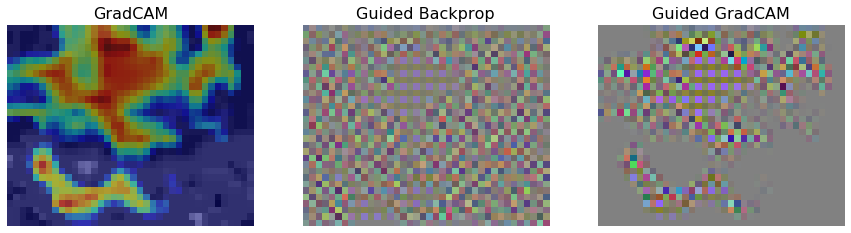

  0%|                                                                          | 0/1 [00:00<?, ?it/s]

Layer 8
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.93531674 0.06468329]
predictions: [[0.93531674 0.06468329]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.935
	fire           	(1)	with probability 0.065
Explanation for 'no_fire'


100%|██████████████████████████████████████████████████████████████████| 1/1 [00:28<00:00, 28.32s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


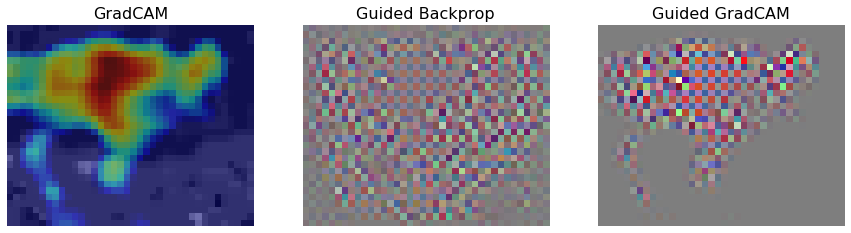

  0%|                                                                          | 0/1 [00:00<?, ?it/s]

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.93531674 0.06468329]
predictions: [[0.93531674 0.06468329]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.935
	fire           	(1)	with probability 0.065
Explanation for 'no_fire'


100%|██████████████████████████████████████████████████████████████████| 1/1 [00:26<00:00, 26.10s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


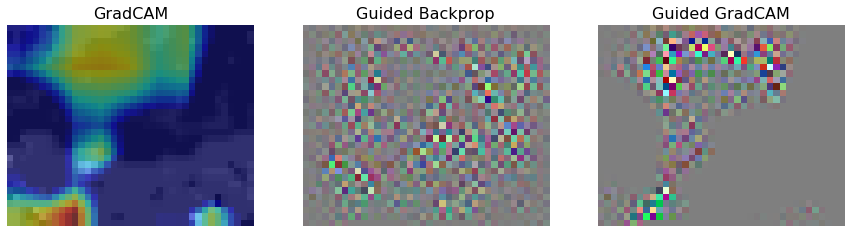

  0%|                                                                          | 0/1 [00:00<?, ?it/s]

Layer 16
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.93531674 0.06468329]
predictions: [[0.93531674 0.06468329]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.935
	fire           	(1)	with probability 0.065
Explanation for 'no_fire'


100%|██████████████████████████████████████████████████████████████████| 1/1 [00:26<00:00, 26.44s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


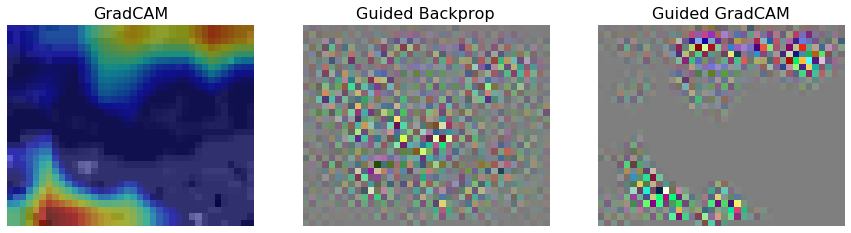

  0%|                                                                          | 0/1 [00:00<?, ?it/s]

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.93531674 0.06468329]
predictions: [[0.93531674 0.06468329]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.935
	fire           	(1)	with probability 0.065
Explanation for 'no_fire'


100%|██████████████████████████████████████████████████████████████████| 1/1 [00:24<00:00, 24.55s/it]


gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


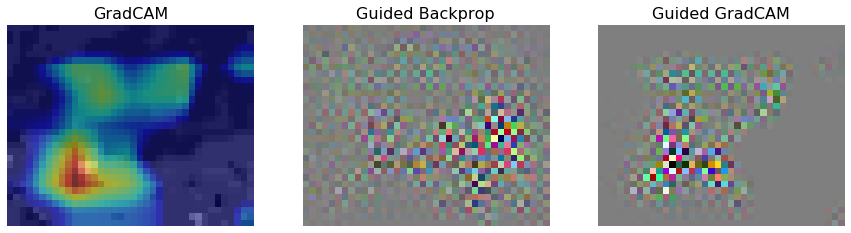

In [71]:
##### GradCam
imagePath = os.path.join('..', 'data', 'dataset', '0_8218.png')
GradCam_Outs(layers=[0,5,8,13,16,19], 
             inputSize=(31,38),
             save=False,
             channels=3)

## AttentionMaps on specific subset
Run visualization techniques on sample_set

In [ ]:
##### GradCam VAL LR SPECIAL SET
VAL_PATH_LR_SPECIAL = os.path.join('..', 'data', 'sample_set', 'LR') 
imagePaths = sorted(list(CPutils_tf2.paths.list_images(VAL_PATH_LR_SPECIAL)))
for imagePath in imagePaths:
    print("Image:", imagePath.split(os.path.sep)[-1])
    GradCam_Outs(layers=[0,5,8,13,16,19], 
                 inputSize=(31,38),
                 channels=3)

In [ ]:
##### GradCam VAL MR SPECIAL SET
VAL_PATH_MR_SPECIAL = os.path.join('..', 'data', 'sample_set', 'MR') 
imagePaths = sorted(list(CPutils_tf2.paths.list_images(VAL_PATH_MR_SPECIAL)))
for imagePath in imagePaths:
    print("Image:", imagePath.split(os.path.sep)[-1])
    GradCam_Outs(layers=[0,5,8,13,16,19], 
                 inputSize=(31,38),
                 channels=3)

Image: 0_15484.png
Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9270489  0.07295109]
predictions: [[0.9270489  0.07295109]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.927
	fire           	(1)	with probability 0.073
Explanation for 'no_fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


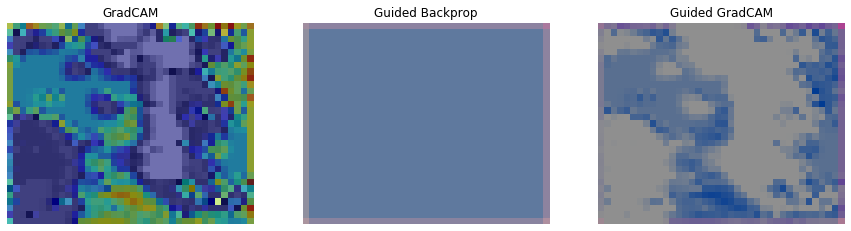

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9270489  0.07295109]
predictions: [[0.9270489  0.07295109]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.927
	fire           	(1)	with probability 0.073
Explanation for 'no_fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


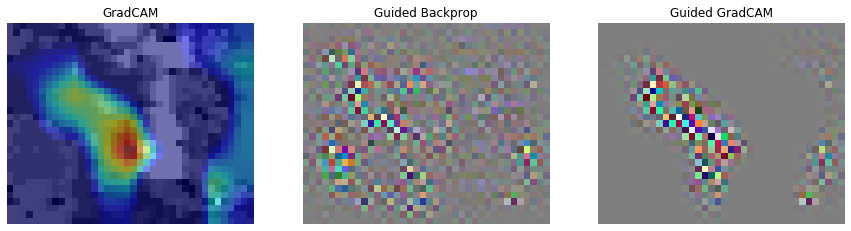

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9270489  0.07295109]
predictions: [[0.9270489  0.07295109]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.927
	fire           	(1)	with probability 0.073
Explanation for 'no_fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


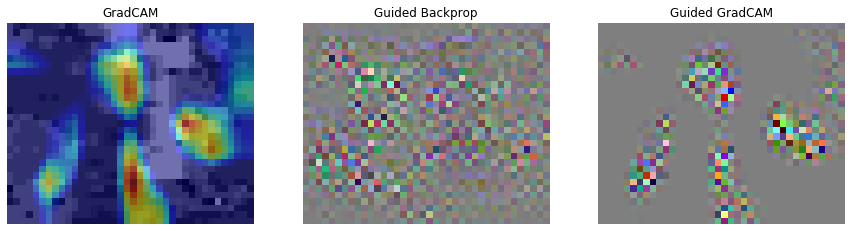

Image: 0_15802.png
Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.51579833 0.4842016 ]
predictions: [[0.4842016  0.51579833]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.516
	no_fire        	(0)	with probability 0.484
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


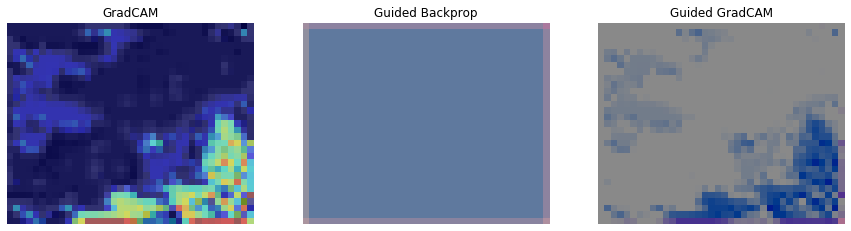

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.51579833 0.4842016 ]
predictions: [[0.4842016  0.51579833]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.516
	no_fire        	(0)	with probability 0.484
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


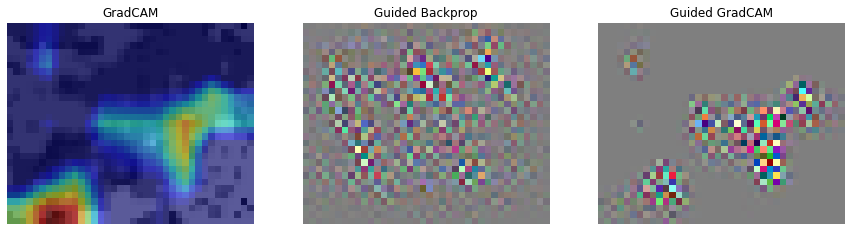

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.51579833 0.4842016 ]
predictions: [[0.4842016  0.51579833]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.516
	no_fire        	(0)	with probability 0.484
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


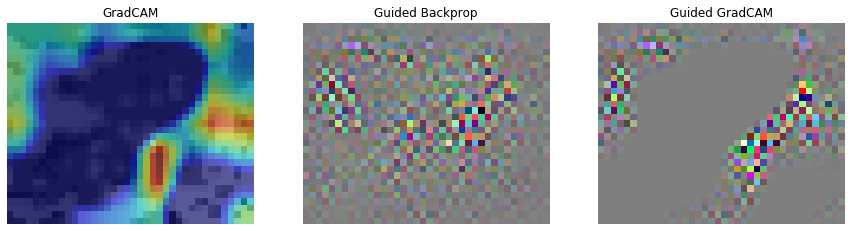

Image: 0_1669.png
Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.6209648  0.37903512]
predictions: [[0.6209648  0.37903512]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.621
	fire           	(1)	with probability 0.379
Explanation for 'no_fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


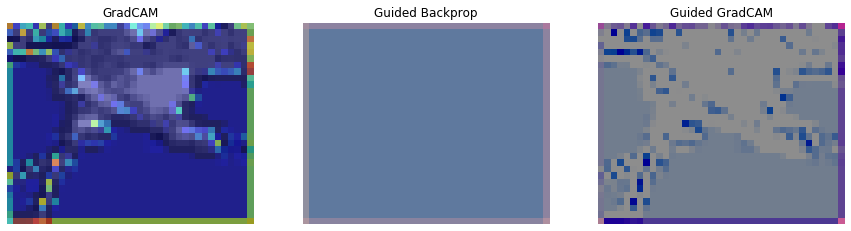

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.6209648  0.37903512]
predictions: [[0.6209648  0.37903512]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.621
	fire           	(1)	with probability 0.379
Explanation for 'no_fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


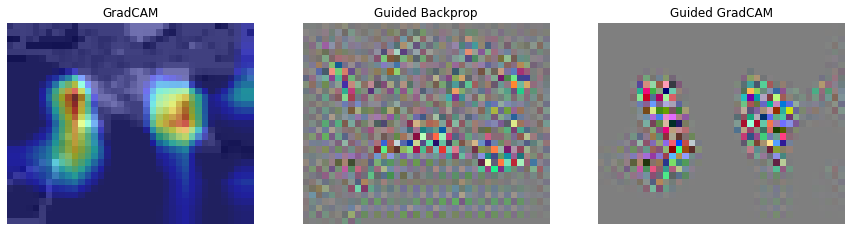

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.6209648  0.37903512]
predictions: [[0.6209648  0.37903512]]
classes: [0 1]
Model prediction:
	no_fire        	(0)	with probability 0.621
	fire           	(1)	with probability 0.379
Explanation for 'no_fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


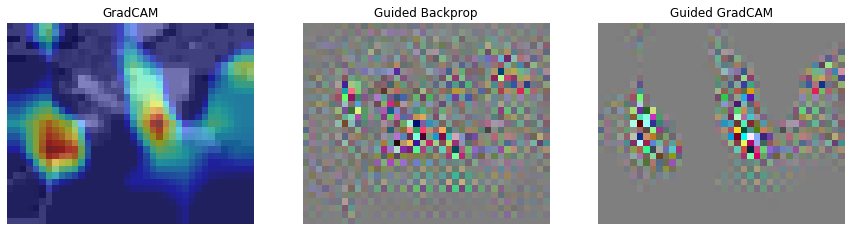

Image: 1_10150.png
Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.77976805 0.22023195]
predictions: [[0.22023195 0.77976805]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.780
	no_fire        	(0)	with probability 0.220
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


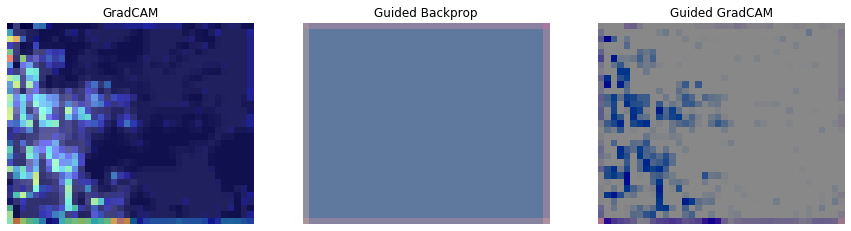

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.77976805 0.22023195]
predictions: [[0.22023195 0.77976805]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.780
	no_fire        	(0)	with probability 0.220
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


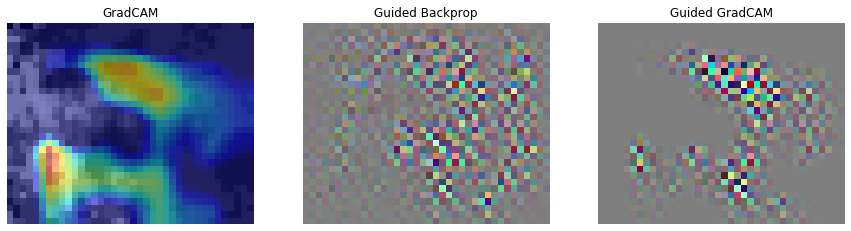

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.77976805 0.22023195]
predictions: [[0.22023195 0.77976805]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.780
	no_fire        	(0)	with probability 0.220
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


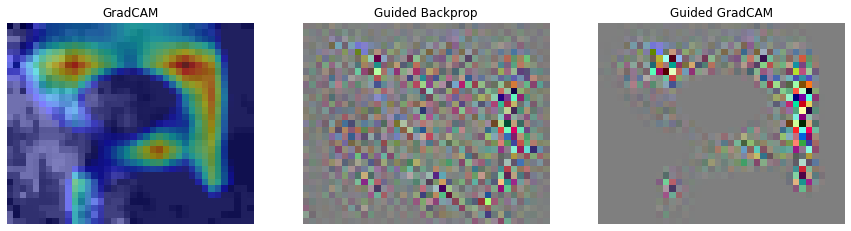

Image: 1_11212.png
Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736624]
predictions: [[0.00736624 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


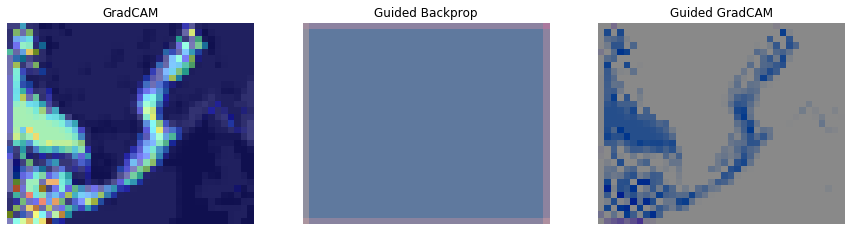

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736624]
predictions: [[0.00736624 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


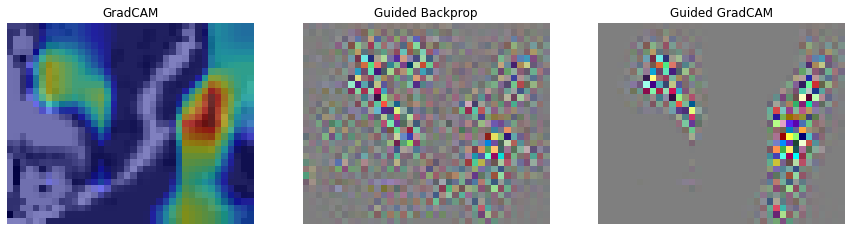

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.99263376 0.00736624]
predictions: [[0.00736624 0.99263376]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.993
	no_fire        	(0)	with probability 0.007
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


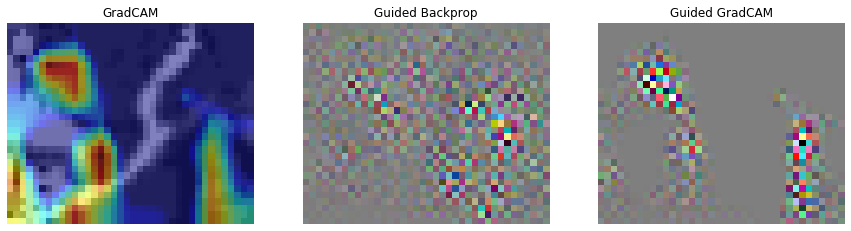

Image: 1_12517.png
Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9726376  0.02736247]
predictions: [[0.02736247 0.9726376 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.973
	no_fire        	(0)	with probability 0.027
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


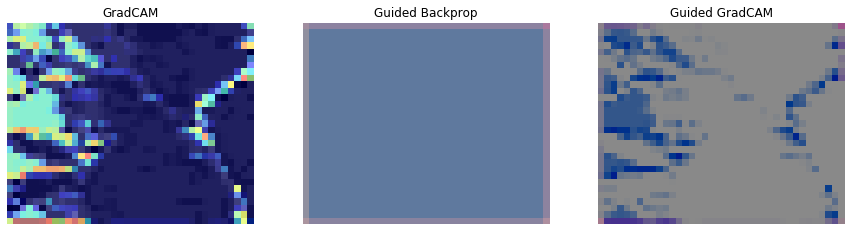

Layer 13
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9726376  0.02736247]
predictions: [[0.02736247 0.9726376 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.973
	no_fire        	(0)	with probability 0.027
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


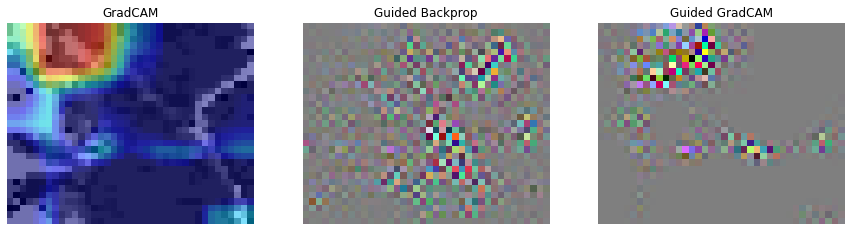

Layer 19
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.9726376  0.02736247]
predictions: [[0.02736247 0.9726376 ]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.973
	no_fire        	(0)	with probability 0.027
Explanation for 'fire'
gradcam: (1, 31, 38)
gb: (1, 31, 38, 3)
guided_backprop: (1, 31, 38, 3)


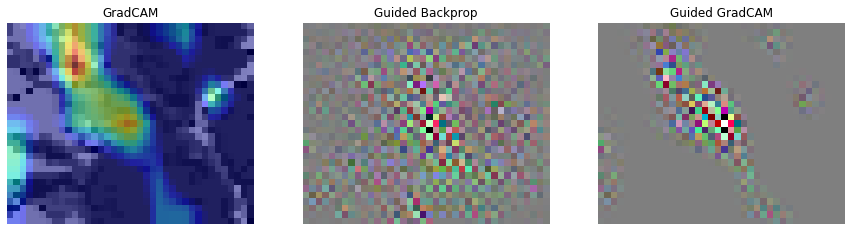

Image: 1_13075.png
Layer 0
Shape image: (31, 38, 3)
Preprocessed inputs: (1, 31, 38, 3)
top: [0.84563375 0.15436625]
predictions: [[0.15436625 0.84563375]]
classes: [1 0]
Model prediction:
	fire           	(1)	with probability 0.846
	no_fire        	(0)	with probability 0.154
Explanation for 'fire'


In [ ]:
##### GradCam VAL HR SPECIAL SET
VAL_PATH_HR_SPECIAL = os.path.join('..', 'data', 'sample_set', 'HR') 
imagePaths = sorted(list(CPutils_tf2.paths.list_images(VAL_PATH_HR_SPECIAL)))
for imagePath in imagePaths:
    print("Image:", imagePath.split(os.path.sep)[-1])
    GradCam_Outs(layers=[0,13,19], 
                 inputSize=(31,38),
                 channels=3)

# ZonalStats: Multiple images
Example of zonal statistics applied using the activation masks

In [16]:
# Extra importation
from tqdm import tqdm

# Load topo images
Set = 'End2End'
BASE_PATH = os.path.join('..', 'data', 'zonalstats_examples') #'dataset_single', 'Set' + str(Set))
imagePaths = sorted(list(CPutils_tf2.paths.list_images(BASE_PATH)))

# Shuffle
seed = 42
random.seed(seed)
random.shuffle(imagePaths)

# Sample
sampleSize = len(imagePaths)           # Whole directory
imagePaths = imagePaths[:sampleSize]

# Container
rawimages = []
imageNames = []

# Loop
for imagePath in tqdm(imagePaths):
    image = cv2.imread(imagePath, -1)
    image = cv2.resize(image, (38, 31))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    rawimages.append(image)
    imageNames.append(imagePath.split(os.path.sep)[-1][:-4])
    
# To array and process
rawimages = np.array(rawimages)
processedimages = rawimages/255.

print("Processedimages:", processedimages.shape)
print("Rawimages:", rawimages.shape)

100%|██████████| 3/3 [00:00<00:00, 449.98it/s]

Processedimages: (3, 31, 38, 3)
Rawimages: (3, 31, 38, 3)


In [17]:
len(imageNames)

3

## GradCAM

100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


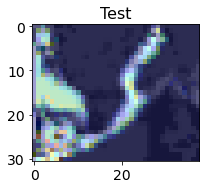

In [30]:
# GradCAM
layer = 'layer_0'
gcam = gradcam_utils_tf2.generate_gradCAM(batch_size=32, 
                                          layer=layer,
                                          model=model,
                                          processedimages=processedimages, 
                                          rawimages=rawimages,
                                          save=True,
                                          savefile='Set' + str(Set) + '.lzma',
                                          showID=0,
                                          title='Test', )

In [27]:
# Shapes
rawimages.shape, gcam.shape

((3, 31, 38, 3), (3, 31, 38))

## Zonal stats

<Figure size 216x216 with 0 Axes>

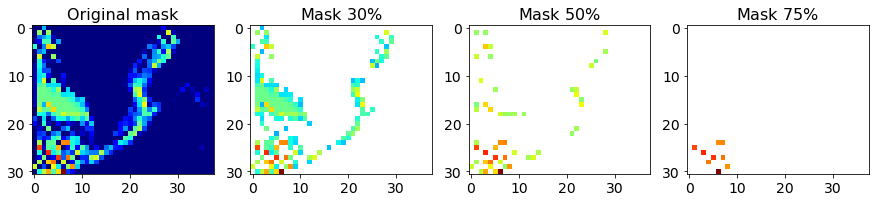

In [31]:
# Attention maps masks at different levels example
idx=0
CPutils_tf2.plt_style()
plt.subplot(1,4,1)
Test = gcam[idx].copy()
plt.title('Original mask')
plt.imshow(Test, cmap='jet',)
plt.subplot(1,4,2)
A = Test.copy()
A[A < .3] = np.nan 
plt.title('Mask $30\%$')
plt.imshow(A, cmap='jet', vmin=0, vmax=1)
plt.subplot(1,4,3)
A_1 = Test.copy()
A_1[A_1 < .5] = np.nan 
plt.title('Mask $50\%$')
plt.imshow(A_1, cmap='jet', vmin=0, vmax=1)
plt.subplot(1,4,4)
A_2 = Test.copy()
A_2[A_2 < .75] = np.nan 
plt.title('Mask $75\%$')
plt.imshow(A_2, cmap='jet', vmin=0, vmax=1)

<Figure size 216x216 with 0 Axes>

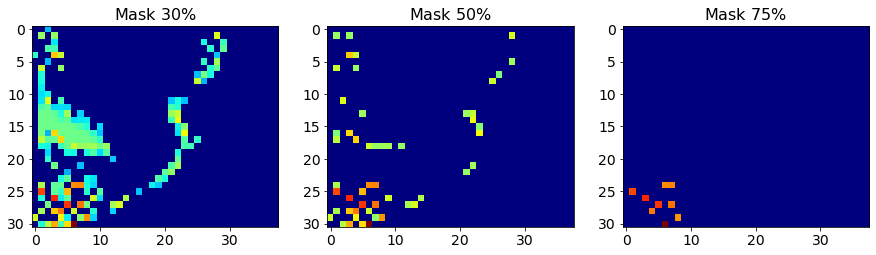

In [32]:
# Filtered masks
CPutils_tf2.plt_style()

# Filtered mask
plt.subplot(1,3,1)
Mask30 = Test.copy()
Mask30[Mask30 < .3] = 0
plt.title('Mask $30\%$')
plt.imshow(Mask30, cmap='jet', vmin=0, vmax=1)

# Filtered mask
plt.subplot(1,3,2)
Mask50 = Test.copy()
Mask50[Mask50 < .5] = 0
plt.title('Mask $50\%$')
plt.imshow(Mask50, cmap='jet', vmin=0, vmax=1)

# Filtered mask
plt.subplot(1,3,3)
Mask75 = Test.copy()
Mask75[Mask75 < .75] = 0
plt.title('Mask $75\%$')
plt.imshow(Mask75, cmap='jet', vmin=0, vmax=1)

In [33]:
# Load geotif associated
TIF_PATH = os.path.join('..', 'data', 'geotif', 'dataset')
tifFiles = []
for image in imageNames:
    tif = image + '.tif'
    tif = cv2.imread(os.path.join(TIF_PATH,tif), -1)
    #tif = cv2.resize(tif, (38,31))
    tifFiles.append(tif)
#tifFiles = np.array(tifFiles)
#tifFiles.shape

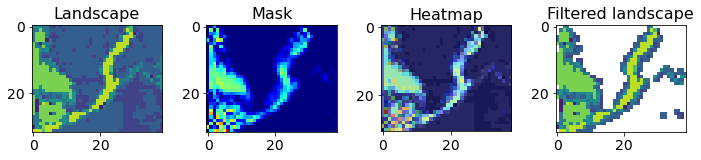

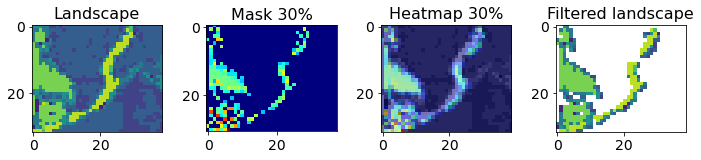

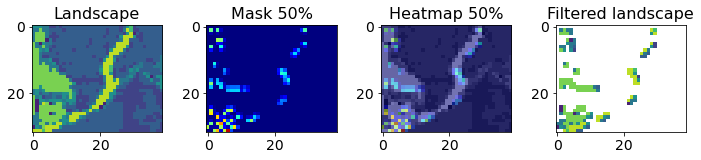

<Figure size 216x216 with 0 Axes>

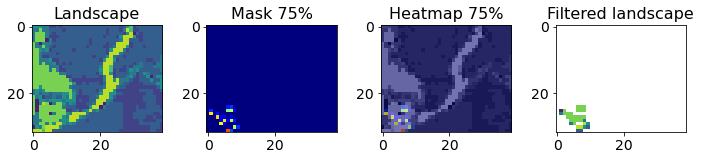

In [34]:
# Filter
ln = 0
idx = 0
CPutils_tf2.plt_style(figsize=(10,10))
plt.subplot(1,4,1)
#plt.title('Landscape (' + imageNames[idx] + ')')
plt.title('Landscape')
plt.tight_layout()
plt.imshow(tifFiles[idx], cmap='viridis', vmin=0, vmax=10)
plt.subplot(1,4,2)
gcamMask = cv2.resize(gcam[idx], (tifFiles[idx].shape[1], tifFiles[idx].shape[0]))
plt.title('Mask')
plt.imshow(gcamMask, vmin=0, vmax=1, cmap='jet')
plt.subplot(1,4,3)
plt.title('Heatmap')
plt.tight_layout()
plt.imshow(tifFiles[idx], cmap='gray', vmin=0, vmax=10)
plt.imshow(gcam[idx], vmin=0, vmax=1, cmap='jet', alpha=0.5)
plt.subplot(1,4,4)
Aux = gcamMask.copy()
Aux[Aux != 0] = 1
Aux[Aux == 0] = -1
Filtered = (Aux * tifFiles[idx]).astype(np.int)
FilteredMA = np.ma.masked_where(Filtered < 0, Filtered, copy=True)
plt.title('Filtered landscape')
plt.tight_layout()
plt.imshow(FilteredMA.astype(np.int), vmin=0, vmax=10)
plt.savefig('Layer_' + str(ln) + '_' + imageNames[idx] + '_0.pdf', dpi=300)

CPutils_tf2.plt_style(figsize=(10,10))
plt.subplot(1,4,1)
#plt.title('Landscape (' + imageNames[idx] + ')')
plt.title('Landscape')
plt.tight_layout()
plt.imshow(tifFiles[idx], cmap='viridis', vmin=0, vmax=10)
plt.subplot(1,4,2)
Mask30R = cv2.resize(Mask30, (tifFiles[idx].shape[1], tifFiles[idx].shape[0]))
plt.title('Mask 30%')
plt.tight_layout()
plt.imshow(Mask30, vmin=0, vmax=1, cmap='jet')
plt.subplot(1,4,3)
plt.title('Heatmap 30%')
plt.tight_layout()
plt.imshow(tifFiles[idx], cmap='gray', vmin=0, vmax=10)
plt.imshow(Mask30R, vmin=0, vmax=1, cmap='jet', alpha=0.5)
plt.subplot(1,4,4)
Aux = Mask30R.copy()
Aux[Aux != 0] = 1
Aux[Aux == 0] = -1
Filtered = (Aux * tifFiles[idx]).astype(np.int)
FilteredMA = np.ma.masked_where(Filtered < 0, Filtered, copy=True)
plt.title('Filtered landscape')
plt.tight_layout()
plt.imshow(FilteredMA.astype(np.int), vmin=0, vmax=10)
plt.savefig('Layer_' + str(ln) + '_' + imageNames[idx] + '_30.pdf', dpi=300)

# Filter
CPutils_tf2.plt_style(figsize=(10,10))
plt.subplot(1,4,1)
plt.title('Landscape')
plt.tight_layout()
plt.imshow(tifFiles[idx], cmap='viridis', vmin=0, vmax=10)
plt.subplot(1,4,2)
Mask50R = cv2.resize(Mask50, (tifFiles[idx].shape[1], tifFiles[idx].shape[0]))
plt.title('Mask 50%')
plt.tight_layout()
plt.imshow(Mask50R, vmin=0, vmax=1, cmap='jet')
plt.subplot(1,4,3)
plt.title('Heatmap 50%')
plt.imshow(tifFiles[idx], cmap='gray', vmin=0, vmax=10)
plt.tight_layout()
plt.imshow(Mask50R, vmin=0, vmax=1, cmap='jet', alpha=0.5)
plt.subplot(1,4,4)
Aux = Mask50R.copy()
Aux[Aux != 0] = 1
Aux[Aux == 0] = -1
Filtered = (Aux * tifFiles[idx]).astype(np.int)
FilteredMA = np.ma.masked_where(Filtered < 0, Filtered, copy=True)
plt.title('Filtered landscape')
plt.tight_layout()
plt.imshow(FilteredMA.astype(np.int), vmin=0, vmax=10)
plt.savefig('Layer_' + str(ln) + '_' + imageNames[idx] + '_50.pdf', dpi=300)

# Filter
CPutils_tf2.plt_style(figsize=(10,10))
plt.subplot(1,4,1)
plt.title('Landscape')
plt.tight_layout()
plt.imshow(tifFiles[idx], cmap='viridis', vmin=0, vmax=10)
plt.subplot(1,4,2)
Mask75R = cv2.resize(Mask75, (tifFiles[idx].shape[1], tifFiles[idx].shape[0]))
plt.title('Mask 75%')
plt.tight_layout()
plt.imshow(Mask75R, vmin=0, vmax=1, cmap='jet')
plt.subplot(1,4,3)
plt.title('Heatmap 75%')
plt.tight_layout()
plt.imshow(tifFiles[idx], cmap='gray', vmin=0, vmax=10)
plt.imshow(Mask75R, vmin=0, vmax=1, cmap='jet', alpha=0.5)
plt.subplot(1,4,4)
Aux = Mask75R.copy()
Aux[Aux != 0] = 1
Aux[Aux == 0] = -1
Filtered = (Aux * tifFiles[idx]).astype(np.int)
FilteredMA = np.ma.masked_where(Filtered < 0, Filtered, copy=True)
plt.title('Filtered landscape')
plt.tight_layout()
plt.imshow(FilteredMA.astype(np.int), vmin=0, vmax=10)
plt.savefig('Layer_' + str(ln) + '_' + imageNames[idx] + '_75.pdf', dpi=300)

In [35]:
# Zonal statistics functions
from collections import Counter
def simpson_di(data):

    """ Given a hash { 'species': count } , returns the Simpson Diversity Index
    
    >>> simpson_di({'a': 10, 'b': 20, 'c': 30,})
    0.3888888888888889
    """

    def p(n, N):
        """ Relative abundance """
        if n is  0:
            return 0
        else:
            return float(n)/N

    N = sum(data.values())
    
    return sum(p(n, N)**2 for n in data.values() if n is not 0)

def zonal_stats(TIFs, GCAMs, ImageIDs, verbose=False):
  
    def MaskFunction(percentage=0.3):
        ## INTERNAL UTILS
        # Components
        maxRow = 500
        maxCol = 500
        visited = np.zeros((maxCol, maxRow)) 

        # Function that return true if mat[row][col] 
        # is valid and hasn't been visited 
        def isSafe(M, row, col, c, n, l): 

            # If row and column are valid and element 
            # is matched and hasn't been visited then 
            # the cell is safe 
            return ((row >= 0 and row < n) and \
                    (col >= 0 and col < l) and \
                    (M[row][col] == c and not \
                     visited[row][col]))

        # Function for depth first search 
        def DFS(M, row, col, c, n, l, nn=4): 

            # These arrays are used to get row 
            # and column numbers of 4 neighbours 
            # of a given cell 
            if nn == 4:
                rowNbr = [ -1, 1, 0, 0 ] 
                colNbr = [ 0, 0, 1, -1 ]
            elif nn == 8:
                rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
                colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 
            else:
                raise ValueError

            # Mark this cell as visited 
            visited[row][col] = True; 

            # Recur for all connected neighbours 
            for k in range(nn) : 
                if (isSafe(M, row + rowNbr[k], col + colNbr[k], c, n, l)): 
                    DFS(M, row + rowNbr[k], col + colNbr[k], c, n, l) 

        # Function to return the number of 
        # connectewd components in the matrix 
        def connectedComponents(M, n, nn=4): 

            connectedComp = 0; 
            l = len(M[0]); 

            for i in range(n): 
                for j in range(l): 
                    if (not visited[i][j]): 
                        c = M[i][j]; 
                        DFS(M, i, j, c, n, l, nn)
                        connectedComp += 1 

            return connectedComp

        
        # Filtered masks 30%
        Mask = gcam.copy()
        Mask[Mask < percentage] = 0
        MaskR = cv2.resize(Mask, (tifFiles[idx].shape[1], tifFiles[idx].shape[0]))
        Aux = MaskR
        Aux[Aux != 0] = 1
        Aux[Aux == 0] = -1
        Filtered = (Aux * tifFiles[idx]).astype(np.int)
        FilteredMA = np.ma.masked_where(Filtered < 0, Filtered, copy=True) #Filtered[Filtered < 0] = np.nan
        if verbose:
            plt.imshow(FilteredMA, vmin=0, vmax=10)
            plt.show()
        
        # Area percentage
        features.append(len(Aux[Aux==1].flatten()) / len(Aux.flatten()))
        if verbose:
            print("Area %:", features[-1])
        
        # Components
        visited = np.zeros((maxCol, maxRow)) 
        I = Filtered.copy()
        I[I < 0] = -1
        n = I.shape[0]
        ncomponents8 = connectedComponents(I, n, nn=8)
        if verbose:
            print("NComp:", ncomponents8 - 1)   # minus the empty patch
        features.append(ncomponents8 - 1)
        
        # Indexes
        LCAux = Counter(Filtered[Filtered >= 0].flatten())
        if verbose:
            print("LCCounter:", LCAux)
        
        ## MN
        features.append(np.sum(FilteredMA) / ncomponents8)
        if verbose:
            print("MN:", features[-1])
        
        ## AMN
        features.append(0)
        if verbose:
            print("AMN:", features[-1])
        
        ## Simpson
        features.append(simpson_di(LCAux))
        if verbose:
            print("Simpson:", features[-1])
        
        # LCovers
        for k in range(0, 11):
            if k in LCAux.keys():
                features.append(LCAux[k])
            else:
                features.append(0)
        if verbose:
            print("LCovers:", features[-11:])
            
        # LCovers proportion
        TotalSum = np.sum([val for val in LCAux.values()])
        for k in range(0, 11):
            if k in LCAux.keys():
                features.append(LCAux[k] / TotalSum)
            else:
                features.append(0)
        if verbose:
            print("LCovers %:", features[-11:])
        
                
        # return calculated features
        return features
            
    # Containers to make DF   
    Columns = ['ID', 'area0', 'ncomp0', 'MN0', 'AMN0', 'SIMP0']
    Columns += ['lcV' + str(i) + '_0' for i in range(0, 11)]
    Columns += ['lcV' + str(i) + '_0%' for i in range(0, 11)]
    Columns +=  ['area30', 'ncomp30', 'MN30', 'AMN30', 'SIMP30']
    Columns += ['lcV' + str(i) + '_30' for i in range(0, 11)]
    Columns += ['lcV' + str(i) + '_30%' for i in range(0, 11)]
    Columns += ['area50', 'ncomp50', 'MN50', 'AMN50', 'SIMP50',] 
    Columns += ['lcV' + str(i) + '_50' for i in range(0, 11)]
    Columns += ['lcV' + str(i) + '_50%' for i in range(0, 11)]
    Columns += ['area75', 'ncomp75', 'MN75', 'AMN75', 'SIMP75']
    Columns += ['lcV' + str(i) + '_75' for i in range(0, 11)]
    Columns += ['lcV' + str(i) + '_75%' for i in range(0, 11)]
    StatsData = []
     
    # Stats loop
    for idx in tqdm(range(len(GCAMs))):
        # Features
        features = []
        features.append(ImageIDs[idx])
        
        # Get gcam mask (full)
        gcam = GCAMs[idx].copy()
        
        # Masks
        for alpha in [0.,0.3,0.5,0.75]:
            features = MaskFunction(percentage=alpha)
        
        StatsData.append(features)
        
    # DF
    DF = pd.DataFrame(StatsData, columns=Columns)
    
    # Return DF
    return DF

  0%|                                                                          | 0/3 [00:00<?, ?it/s]

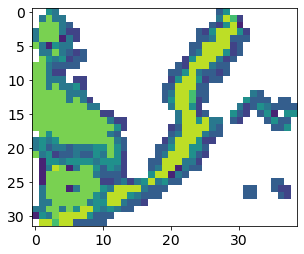

Area %: 0.4519230769230769
NComp: 181
LCCounter: Counter({8: 134, 3: 120, 4: 96, 9: 80, 5: 65, 2: 52, 1: 13, 7: 4})
MN: 16.516483516483518
AMN: 0
Simpson: 0.17317413610985366
LCovers: [0, 13, 52, 120, 96, 65, 0, 4, 134, 80, 0]
LCovers %: [0, 0.02304964539007092, 0.09219858156028368, 0.2127659574468085, 0.1702127659574468, 0.11524822695035461, 0, 0.0070921985815602835, 0.2375886524822695, 0.14184397163120568, 0]


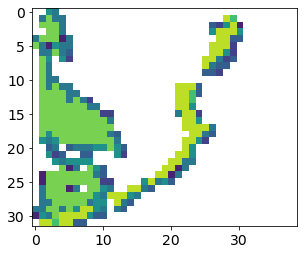

Area %: 0.27403846153846156
NComp: 111
LCCounter: Counter({8: 119, 4: 65, 9: 62, 5: 38, 3: 29, 2: 15, 1: 10, 7: 4})
MN: 18.883928571428573
AMN: 0
Simpson: 0.21250983208508603
LCovers: [0, 10, 15, 29, 65, 38, 0, 4, 119, 62, 0]
LCovers %: [0, 0.029239766081871343, 0.043859649122807015, 0.0847953216374269, 0.19005847953216373, 0.1111111111111111, 0, 0.011695906432748537, 0.347953216374269, 0.18128654970760233, 0]


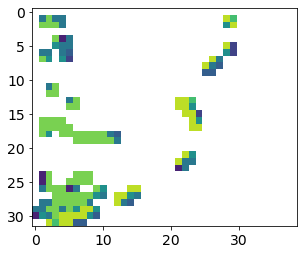

Area %: 0.12980769230769232
NComp: 68
LCCounter: Counter({8: 63, 4: 31, 9: 30, 5: 16, 3: 9, 1: 6, 2: 4, 7: 3})
MN: 15.072463768115941
AMN: 0
Simpson: 0.23731138545953362
LCovers: [0, 6, 4, 9, 31, 16, 0, 3, 63, 30, 0]
LCovers %: [0, 0.037037037037037035, 0.024691358024691357, 0.05555555555555555, 0.19135802469135801, 0.09876543209876543, 0, 0.018518518518518517, 0.3888888888888889, 0.18518518518518517, 0]


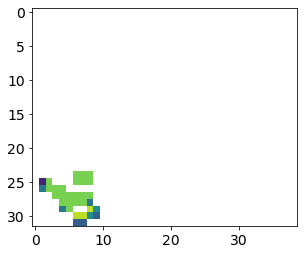

 33%|██████████████████████                                            | 1/3 [00:00<00:00,  2.28it/s]

Area %: 0.026442307692307692
NComp: 11
LCCounter: Counter({8: 21, 4: 3, 9: 3, 3: 3, 5: 2, 1: 1})
MN: 18.916666666666668
AMN: 0
Simpson: 0.43434343434343436
LCovers: [0, 1, 0, 3, 3, 2, 0, 0, 21, 3, 0]
LCovers %: [0, 0.030303030303030304, 0, 0.09090909090909091, 0.09090909090909091, 0.06060606060606061, 0, 0, 0.6363636363636364, 0.09090909090909091, 0]


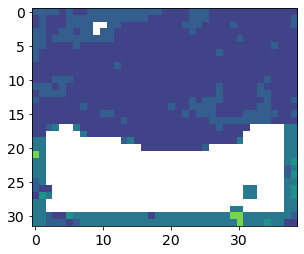

Area %: 0.7035256410256411
NComp: 58
LCCounter: Counter({2: 613, 3: 145, 4: 109, 5: 7, 8: 4})
MN: 36.67796610169491
AMN: 0
Simpson: 0.5302224459192304
LCovers: [0, 0, 613, 145, 109, 7, 0, 0, 4, 0, 0]
LCovers %: [0, 0, 0.6981776765375854, 0.16514806378132119, 0.12414578587699317, 0.007972665148063782, 0, 0, 0.004555808656036446, 0, 0]


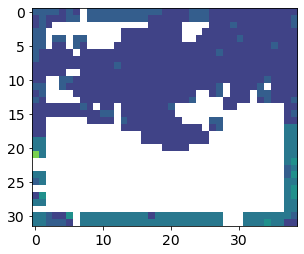

Area %: 0.5496794871794872
NComp: 64
LCCounter: Counter({2: 503, 3: 88, 4: 87, 5: 7, 8: 1})
MN: 25.553846153846155
AMN: 0
Simpson: 0.570281090362009
LCovers: [0, 0, 503, 88, 87, 7, 0, 0, 1, 0, 0]
LCovers %: [0, 0, 0.7332361516034985, 0.1282798833819242, 0.12682215743440234, 0.01020408163265306, 0, 0, 0.0014577259475218659, 0, 0]


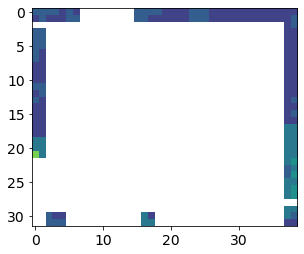

Area %: 0.1346153846153846
NComp: 33
LCCounter: Counter({2: 93, 3: 43, 4: 27, 5: 4, 8: 1})
MN: 13.264705882352942
AMN: 0
Simpson: 0.3983843537414966
LCovers: [0, 0, 93, 43, 27, 4, 0, 0, 1, 0, 0]
LCovers %: [0, 0, 0.5535714285714286, 0.25595238095238093, 0.16071428571428573, 0.023809523809523808, 0, 0, 0.005952380952380952, 0, 0]


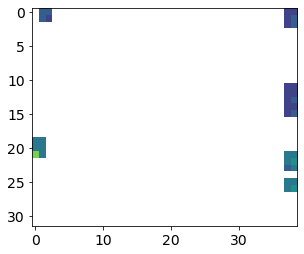

 67%|████████████████████████████████████████████                      | 2/3 [00:00<00:00,  2.22it/s]

Area %: 0.028846153846153848
NComp: 15
LCCounter: Counter({2: 13, 4: 12, 3: 8, 5: 2, 8: 1})
MN: 7.25
AMN: 0
Simpson: 0.2947530864197531
LCovers: [0, 0, 13, 8, 12, 2, 0, 0, 1, 0, 0]
LCovers %: [0, 0, 0.3611111111111111, 0.2222222222222222, 0.3333333333333333, 0.05555555555555555, 0, 0, 0.027777777777777776, 0, 0]


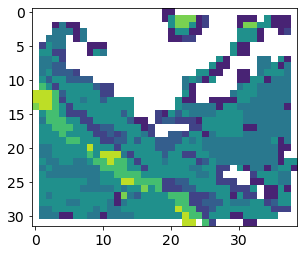

Area %: 0.6618589743589743
NComp: 164
LCCounter: Counter({5: 335, 4: 204, 1: 92, 2: 76, 3: 47, 7: 43, 9: 19, 8: 10})
MN: 20.775757575757577
AMN: 0
Simpson: 0.2529768011772362
LCovers: [0, 92, 76, 47, 204, 335, 0, 43, 10, 19, 0]
LCovers %: [0, 0.11138014527845036, 0.09200968523002422, 0.05690072639225181, 0.2469733656174334, 0.40556900726392253, 0, 0.05205811138014528, 0.012106537530266344, 0.023002421307506054, 0]


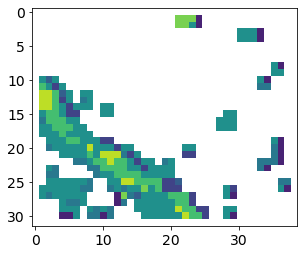

Area %: 0.24358974358974358
NComp: 88
LCCounter: Counter({5: 155, 7: 42, 4: 38, 2: 24, 1: 19, 9: 15, 8: 7, 3: 4})
MN: 16.752808988764045
AMN: 0
Simpson: 0.30795533240997225
LCovers: [0, 19, 24, 4, 38, 155, 0, 42, 7, 15, 0]
LCovers %: [0, 0.0625, 0.07894736842105263, 0.013157894736842105, 0.125, 0.5098684210526315, 0, 0.13815789473684212, 0.023026315789473683, 0.049342105263157895, 0]


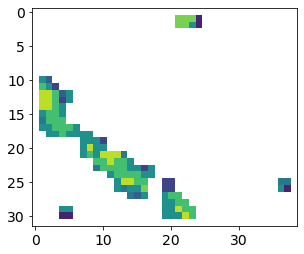

Area %: 0.10176282051282051
NComp: 42
LCCounter: Counter({5: 48, 7: 35, 9: 15, 2: 8, 4: 7, 8: 6, 1: 5, 3: 3})
MN: 16.88372093023256
AMN: 0
Simpson: 0.2440944881889764
LCovers: [0, 5, 8, 3, 7, 48, 0, 35, 6, 15, 0]
LCovers %: [0, 0.03937007874015748, 0.06299212598425197, 0.023622047244094488, 0.05511811023622047, 0.3779527559055118, 0, 0.2755905511811024, 0.047244094488188976, 0.11811023622047244, 0]


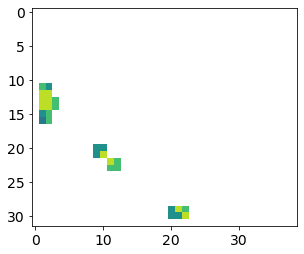

100%|██████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.15it/s]

Area %: 0.022435897435897436
NComp: 13
LCCounter: Counter({9: 10, 7: 9, 5: 8, 4: 1})
MN: 14.071428571428571
AMN: 0
Simpson: 0.3137755102040816
LCovers: [0, 0, 0, 0, 1, 8, 0, 9, 0, 10, 0]
LCovers %: [0, 0, 0, 0, 0.03571428571428571, 0.2857142857142857, 0, 0.32142857142857145, 0, 0.35714285714285715, 0]


,ID,area0,ncomp0,MN0,AMN0,SIMP0,lcV0_0,lcV1_0,lcV2_0,lcV3_0,...,lcV1_75%,lcV2_75%,lcV3_75%,lcV4_75%,lcV5_75%,lcV6_75%,lcV7_75%,lcV8_75%,lcV9_75%,lcV10_75%
0,1_11212,0.451923,181,16.516484,0,0.173174,0,13,52,120,...,0.030303,0.000000,0.090909,0.090909,0.060606,0,0.000000,0.636364,0.090909,0
1,0_8218,0.703526,58,36.677966,0,0.530222,0,0,613,145,...,0.000000,0.361111,0.222222,0.333333,0.055556,0,0.000000,0.027778,0.000000,0
2,1_11807,0.661859,164,20.775758,0,0.252977,0,92,76,47,...,0.000000,0.000000,0.000000,0.035714,0.285714,0,0.321429,0.000000,0.357143,0


In [119]:
DF = zonal_stats(TIFs=tifFiles, GCAMs=gcam, ImageIDs=imageNames, verbose=True)
DF

In [85]:
# Check columns
DF[['ID', 'area0', 'area30', 'area50', 'area75', 
    'ncomp0','ncomp30', 'ncomp50', 'ncomp75', 
    'SIMP0', 'SIMP30', 'SIMP50', 'SIMP75']]

,ID,area0,area30,area50,area75,ncomp0,ncomp30,ncomp50,ncomp75,SIMP0,SIMP30,SIMP50,SIMP75
0,1_11212,0.490385,0.173077,0.105769,0.038462,155,64,46,19,0.181757,0.254844,0.284206,0.272569
1,0_8218,0.568109,0.367788,0.228365,0.083333,34,21,13,2,0.500586,0.693432,0.861816,0.980954
2,1_11807,0.614583,0.287660,0.144231,0.046474,132,62,28,10,0.224470,0.231586,0.233704,0.259215


In [86]:
DF[['lcV' + str(i) + '_0%' for i in range(11)]]

,lcV0_0%,lcV1_0%,lcV2_0%,lcV3_0%,lcV4_0%,lcV5_0%,lcV6_0%,lcV7_0%,lcV8_0%,lcV9_0%,lcV10_0%
0,0,0.021242,0.102941,0.281046,0.155229,0.101307,0,0.008170,0.202614,0.127451,0
1,0,0.000000,0.665726,0.119887,0.207334,0.005642,0,0.000000,0.000000,0.001410,0
2,0,0.198175,0.148631,0.065189,0.195567,0.345502,0,0.033898,0.007823,0.005215,0


In [87]:
DF[['lcV' + str(i) + '_0%' for i in range(11)]]

,lcV0_0%,lcV1_0%,lcV2_0%,lcV3_0%,lcV4_0%,lcV5_0%,lcV6_0%,lcV7_0%,lcV8_0%,lcV9_0%,lcV10_0%
0,0,0.021242,0.102941,0.281046,0.155229,0.101307,0,0.008170,0.202614,0.127451,0
1,0,0.000000,0.665726,0.119887,0.207334,0.005642,0,0.000000,0.000000,0.001410,0
2,0,0.198175,0.148631,0.065189,0.195567,0.345502,0,0.033898,0.007823,0.005215,0


In [88]:
DF[['lcV' + str(i) + '_50%' for i in range(11)]]

,lcV0_50%,lcV1_50%,lcV2_50%,lcV3_50%,lcV4_50%,lcV5_50%,lcV6_50%,lcV7_50%,lcV8_50%,lcV9_50%,lcV10_50%
0,0,0.060606,0.007576,0.075758,0.189394,0.106061,0,0.007576,0.469697,0.083333,0
1,0,0.000000,0.926316,0.059649,0.014035,0.000000,0,0.000000,0.000000,0.000000,0
2,0,0.216667,0.166667,0.027778,0.277778,0.283333,0,0.027778,0.000000,0.000000,0


In [89]:
DF[['lcV' + str(i) + '_75%' for i in range(11)]]

,lcV0_75%,lcV1_75%,lcV2_75%,lcV3_75%,lcV4_75%,lcV5_75%,lcV6_75%,lcV7_75%,lcV8_75%,lcV9_75%,lcV10_75%
0,0,0.062500,0.020833,0.083333,0.229167,0.187500,0,0.000000,0.416667,0,0
1,0,0.000000,0.990385,0.009615,0.000000,0.000000,0,0.000000,0.000000,0,0
2,0,0.327586,0.155172,0.034483,0.137931,0.327586,0,0.017241,0.000000,0,0


In [105]:
# Zonal stats full function
def zonal_stats_default(TIFs, ImageIDs, verbose=False):
  
    def MaskFunctionV2(percentage=1):
        ## INTERNAL UTILS
        # Components
        maxRow = 500
        maxCol = 500
        visited = np.zeros((maxCol, maxRow)) 

        # Function that return true if mat[row][col] 
        # is valid and hasn't been visited 
        def isSafeV2(M, row, col, c, n, l): 

            # If row and column are valid and element 
            # is matched and hasn't been visited then 
            # the cell is safe 
            return ((row >= 0 and row < n) and \
                    (col >= 0 and col < l) and \
                    (M[row][col] == c and not \
                     visited[row][col]))

        # Function for depth first search 
        def DFSV2(M, row, col, c, n, l, nn=4): 

            # These arrays are used to get row 
            # and column numbers of 4 neighbours 
            # of a given cell 
            if nn == 4:
                rowNbr = [ -1, 1, 0, 0 ] 
                colNbr = [ 0, 0, 1, -1 ]
            elif nn == 8:
                rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
                colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 
            else:
                raise ValueError

            # Mark this cell as visited 
            visited[row][col] = True; 

            # Recur for all connected neighbours 
            for k in range(nn) : 
                if (isSafeV2(M, row + rowNbr[k], col + colNbr[k], c, n, l)): 
                    DFSV2(M, row + rowNbr[k], col + colNbr[k], c, n, l) 

        # Function to return the number of 
        # connectewd components in the matrix 
        def connectedComponentsV2(M, n, nn=4): 

            connectedComp = 0; 
            l = len(M[0]); 

            for i in range(n): 
                for j in range(l): 
                    if (not visited[i][j]): 
                        c = M[i][j]; 
                        DFSV2(M, i, j, c, n, l, nn)
                        connectedComp += 1 

            return connectedComp

        # Area percentage
        features.append(1)
        if verbose:
            print("Area %:", features[-1])
        
        # Components
        visited = np.zeros((maxCol, maxRow)) 
        I = TIF.copy()
        I[I < 0] = 0
        n = I.shape[0]
        ncomponents8 = connectedComponentsV2(I, n, nn=8)
        if verbose:
            print("NComp:", ncomponents8 - 1)   # minus the empty patch
        features.append(ncomponents8 - 1)
        
        # Indexes
        LCAux = Counter(TIF[TIF >= 0].flatten())
        if verbose:
            print("LCCounter:", LCAux)
        
        ## MN
        features.append(np.sum(TIF) / ncomponents8)
        if verbose:
            print("MN:", features[-1])
        
        ## AMN
        features.append(0)
        if verbose:
            print("AMN:", features[-1])
        
        ## Simpson
        features.append(simpson_di(LCAux))
        if verbose:
            print("Simpson:", features[-1])
        
        # LCovers
        for k in range(0, 11):
            if k in LCAux.keys():
                features.append(LCAux[k])
            else:
                features.append(0)
        if verbose:
            print("LCovers:", features[-11:])
            
        # LCovers proportion
        TotalSum = np.sum([val for val in LCAux.values()])
        for k in range(0, 11):
            if k in LCAux.keys():
                features.append(LCAux[k] / TotalSum)
            else:
                features.append(0)
        if verbose:
            print("LCovers %:", features[-11:])
        
                
        # return calculated features
        return features
            
    # Containers to make DF   
    Columns = ['ID', 'area_original', 'ncomp_original', 'MN_original', 'AMN_original', 'SIMP_original']
    Columns += ['lcV' + str(i) + '_original' for i in range(0, 11)]
    Columns += ['lcV' + str(i) + '%_original' for i in range(0, 11)]
    StatsData = []
     
    # Stats loop
    for idx in tqdm(range(len(TIFs))):
        # Features
        features = []
        features.append(ImageIDs[idx])
        
        # Get gcam mask (full)
        TIF = TIFs[idx].copy()
        
        # Masks
        features = MaskFunctionV2(percentage=0)
        StatsData.append(features)
        
    # DF
    DF = pd.DataFrame(StatsData, columns=Columns)
    
    # Return DF
    return DF

In [106]:
DFOrig = zonal_stats_default(tifFiles, imageNames)
DFOrig.to_excel('ZonalStats_Original.xlsx', index=False)

100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 214.43it/s]


## Batch of GCAM
Process a batch of raw images

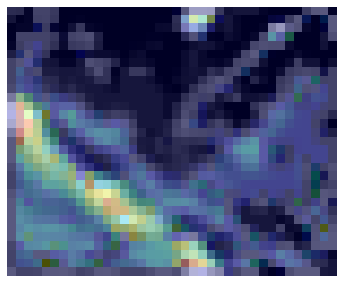

In [36]:
# Process a batch of rawimages
outGCAM = os.path.join('..', 'exp_outputs', 'GCAM_output')
if not os.path.exists(outGCAM):
    os.makedirs(outGCAM)

# Size
plt.rcParams['figure.figsize'] = 5,5
    
# Save processed pictures
for idx, image in enumerate(rawimages):
    fileName = os.path.join(outGCAM, imageNames[idx] + '.png')
    im = plt.imshow(rawimages[idx])
    im2 = plt.imshow(gcam[idx], alpha=0.3, cmap='jet')
    plt.axis('off')
    plt.tight_layout()
    plt.axis("tight")  # gets rid of white border
    plt.axis("image")  # square up the image instead of filling the "figure" space
    plt.savefig(fileName, bbox_inches='tight', pad_inches=0.0)
    
# Read back the gcam processed
GCAM_imagesPaths = sorted(list(paths.list_images(outGCAM)))
GCAM_images = []
for imagepath in GCAM_imagesPaths:
    image = cv2.imread(imagepath)
    image = cv2.resize(image, (128,128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    GCAM_images.append(image)    

In [37]:
# Process rawimages and gcam and save gcam ones (returns array of images)
def gcam_processed(rawimages, 
                   gcam,
                   outGCAM=os.path.join('GCAM_output'),
                   show=False, 
                   size=(5,5), 
                   outsize=(128,128)):
    # Process a batch of rawimages
    if not os.path.exists(outGCAM):
        os.makedirs(outGCAM)

    # Size
    if show:
        plt.rcParams['figure.figsize'] = size

    # Save processed pictures
    for idx, image in enumerate(rawimages):
        fileName = os.path.join(outGCAM, str(idx) + '.png')
        im = plt.imshow(rawimages[idx])
        im2 = plt.imshow(gcam[idx], alpha=0.3, cmap='jet')
        plt.axis('off')
        plt.tight_layout()
        plt.axis("tight")  # gets rid of white border
        plt.axis("image")  # square up the image instead of filling the "figure" space
        plt.savefig(fileName, bbox_inches='tight', pad_inches=0.0)

    # Read back the gcam processed
    GCAM_imagesPaths = sorted(list(paths.list_images(outGCAM)))
    GCAM_images = []
    
    # Processe back
    for imagepath in GCAM_imagesPaths:
        image = cv2.imread(imagepath)
        image = cv2.resize(image, outsize)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        GCAM_images.append(image)    
        
    # Return
    return GCAM_images

In [38]:
# Get array (example to get from memory)
ima = im.get_array()
imb = im2.get_array()

## Montages
Visualize multiple images

<Figure size 360x360 with 0 Axes>

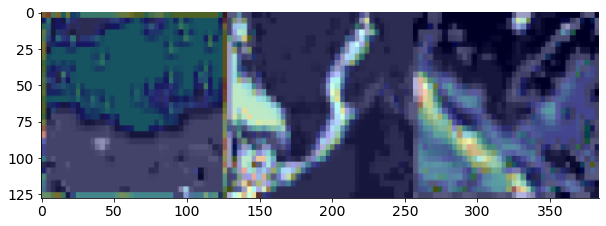

In [59]:
# GradCAM montage (selection)
CPutils_tf2.plt_style(figsize=(10,10))
_ = CPutils_tf2.build_montages(image_list=GCAM_images,
                               image_shape=(128,128),
                               montage_shape=(3,1))
plt.imshow(_[0])
OUT_COLLAGE = os.path.join('..', 'exp_outputs', 'collages', 'gradCAM')
if not os.path.exists(OUT_COLLAGE):
    os.makedirs(OUT_COLLAGE)
plt.imsave(os.path.join(OUT_COLLAGE, 'gradCAM_collage.png'), _[0])

/home/cris/envs/mobility/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/cris/envs/mobility/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tigh_layout" which is no longer supported as of 3.3 and will become an error two minor releases later


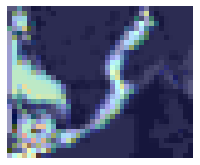

In [43]:
# Example of reading image on the fly from plot
from io import StringIO
from io import BytesIO
import PIL

# Generate plot
plt.rcParams['figure.figsize'] = 3,3
im = plt.imshow(rawimages[0], aspect='equal')
im2 = plt.imshow(gcam[0], alpha=0.3, cmap='jet', aspect='equal')
plt.axis('off')
plt.tight_layout()
plt.axis("tight")  # gets rid of white border
plt.axis("image")  # square up the image instead of filling the "figure" space

# Read plot on-the-fly
buffer_ = BytesIO()
plt.savefig(buffer_, format="png", pad=0, 
           tigh_layout=True, pad_inches=0, 
           bbox_inches='tight')
buffer_.seek(0)
image = PIL.Image.open(buffer_)
ar = np.asarray(image)
buffer_.close()

Processedimages: (100, 31, 38, 1)
Rawimages: (100, 31, 38, 1)


<Figure size 360x360 with 0 Axes>

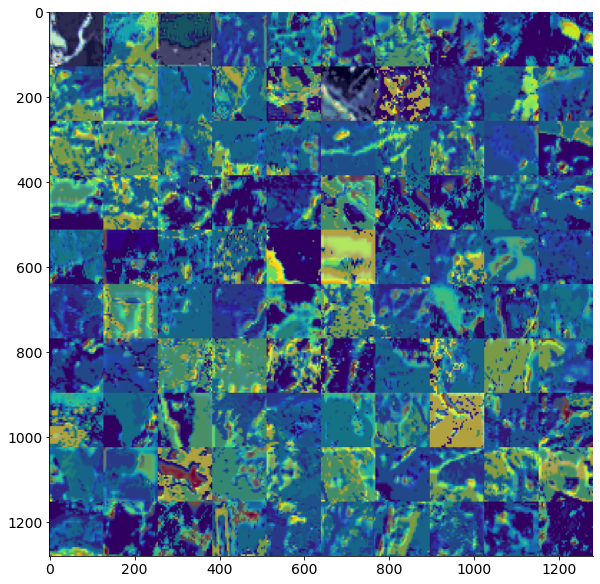

In [82]:
# Load 100 random images from fire class, calculate gradcam and montage
BASE_PATH = os.path.join('..', 'data', 'dataset', 'fire')
imagePaths = sorted(list(CPutils_tf2.paths.list_images(BASE_PATH)))

# Shuffle
seed = 42
random.seed(seed)
random.shuffle(imagePaths)

# Sample
sampleSize = 100
imagePaths = imagePaths[:sampleSize]

# Container
rawimages = []

# Loop
for imagePath in imagePaths:
    image = cv2.imread(imagePath, -1)
    image = cv2.resize(image, (38, 31))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    rawimages.append(np.expand_dims(image, -1))
    
# To array and process
rawimages = np.array(rawimages)
processedimages = rawimages/255.

print("Processedimages:", processedimages.shape)
print("Rawimages:", rawimages.shape)

# Process a batch of rawimages
outGCAM = os.path.join('..', 'exp_outputs', 'GCAM_output')
if not os.path.exists(outGCAM):
    os.makedirs(outGCAM)

# Size
plt.rcParams['figure.figsize'] = 5,5
        
# Read back the gcam processed
GCAM_imagesPaths = sorted(list(paths.list_images(outGCAM)))
GCAM_images = []
for imagepath in GCAM_imagesPaths:
    image = cv2.imread(imagepath)
    image = cv2.resize(image, (128,128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    GCAM_images.append(image)    
    
# GradCAM montage (selection)
CPutils_tf2.plt_style(figsize=(10,10))
_ = CPutils_tf2.build_montages(image_list=GCAM_images,
                               image_shape=(128,128),
                               montage_shape=(10,10))
plt.imshow(_[0])
OUT_COLLAGE = os.path.join('..', 'exp_outputs', 'collages', 'gradCAM')
if not os.path.exists(OUT_COLLAGE):
    os.makedirs(OUT_COLLAGE)
plt.imsave(os.path.join(OUT_COLLAGE, 'gradCAM_collage.png'), _[0])

## Guided BackProp

In [55]:
# Process rawimages and gcam and save gcam ones (returns array of images)
def gprop_processed(gprop,
                    outGPROP=os.path.join('..', 'exp_outputs', 'GPROP_output'),
                    deprocess_object=None,
                    show=False, 
                    size=(5,5), 
                    outsize=(128,128)):
    # Process a batch of rawimages
    if not os.path.exists(outGPROP):
        os.makedirs(outGPROP)

    # Save processed pictures
    for idx, image in enumerate(rawimages):
        plt.imsave(os.path.join(outGPROP, str(idx) + '.png'), 
                   np.flip(deprocess_object(gprop[idx]), -1), 
                   cmap='jet', format='png')
        
    # Show
    if show:
        plt.rcParams['figure.figsize'] = size
        plt.imshow(np.flip(deprocess_object(gprop[idx]), -1), 
                   cmap='jet',)

    # Read back the gcam processed
    GPROP_imagesPaths = sorted(list(paths.list_images(outGPROP)))
    GPROP_images = []
    
    # Processe back
    for imagepath in GPROP_imagesPaths:
        image = cv2.imread(imagepath)
        image = cv2.resize(image, outsize)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        GPROP_images.append(image)    
        
    # Return
    return GPROP_images

In [ ]:
# Guided BackProp
CPutils_tf2.plt_style(figsize=(4,4))
gprop = gradcam_utils_tf2.generate_guidedbackprop(batch_size=32, 
                                                  deprocess_object=gradcam_utils_tf2.deprocess_image,
                                                  guided_model=guided_model,
                                                  layer=layer,
                                                  processedimages=processedimages,
                                                  save=False,
                                                  showID=0,
                                                  title='')

In [ ]:
# Save and get gprop files
gpropSet = gprop_processed(gprop, deprocess_object=gradcam_utils_tf2.deprocess_image)

# GPROPR montage
CPutils_tf2.plt_style(figsize=(10,10))
_ = CPutils_tf2.build_montages(image_list=gpropSet,
                               image_shape=(128,128),
                               montage_shape=(3,1))
plt.imshow(_[0])
OUT_COLLAGE = os.path.join('..', 'exp_outputs', 'collages', 'gProp')
if not os.path.exists(OUT_COLLAGE):
    os.makedirs(OUT_COLLAGE)
plt.imsave(os.path.join(OUT_COLLAGE, 'gProp_collage.png'), _[0])

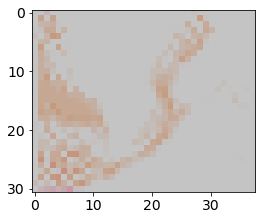

In [51]:
# Guided GradCAM BackProp
plt.rcParams['figure.figsize'] = 4,4
ggcam = gradcam_utils_tf2.generate_guidedgradCAM(deprocess_object=gradcam_utils_tf2.deprocess_image,
                                                 gbp=gprop,
                                                 gradcam=gcam,
                                                 save=False,
                                                 showID=0,
                                                 title='')

## Guided GradCam

In [52]:
# Process rawimages and gcam and save gcam ones (returns array of images)
def guidedGCAM_processed(gprop,
                         gradcam,
                         outGGCAM=os.path.join('..', 'exp_outputs', 'GGCAM_output'),
                         deprocess_object=None,
                         show=False, 
                         size=(5,5), 
                         alpha=0.5,
                         outsize=(128,128)):
    # Process a batch of rawimages
    if not os.path.exists(outGGCAM):
        os.makedirs(outGGCAM)
        
    # Guided gradCam
    guided_gradcam = gprop * gradcam[..., np.newaxis]

    # Save processed pictures
    for idx, image in enumerate(guided_gradcam):
        plt.imsave(os.path.join(outGGCAM, str(idx) + '.png'), 
                   np.flip(deprocess_object(guided_gradcam[idx]), -1), 
                   cmap='jet', format='png')
        
    # Show
    if show:
        plt.rcParams['figure.figsize'] = size
        plt.imshow(np.flip(deprocess_object(guided_gradcam[idx]), -1), 
                   cmap='jet', alpha=alpha)

    # Read back the gcam processed
    GGCAM_imagesPaths = sorted(list(paths.list_images(outGGCAM)))
    GGCAM_images = []
    
    # Processe back
    for imagepath in GGCAM_imagesPaths:
        image = cv2.imread(imagepath)
        image = cv2.resize(image, outsize)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        GGCAM_images.append(image)    
        
    # Return
    return GGCAM_images

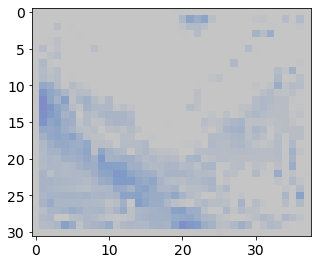

In [53]:
# Save and get GGCAM files
GGCAM_images = guidedGCAM_processed(gprop=gprop, 
                                    gradcam=gcam, 
                                    deprocess_object=gradcam_utils_tf2.deprocess_image,
                                    show=True)

<Figure size 360x360 with 0 Axes>

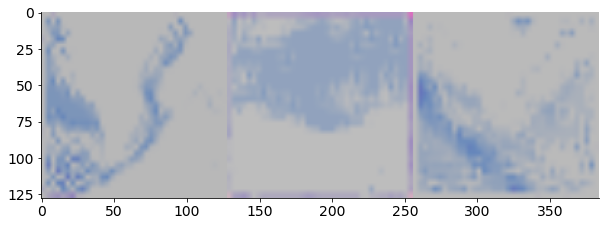

In [54]:
# GPROPR montage
CPutils_tf2.plt_style(figsize=(10,10))
_ = CPutils_tf2.build_montages(image_list=GGCAM_images,
                               image_shape=(128,128),
                               montage_shape=(3,1))
plt.imshow(_[0], alpha=.6)
OUT_COLLAGE = os.path.join('..', 'exp_outputs', 'collages', 'GRProp')
if not os.path.exists(OUT_COLLAGE):
    os.makedirs(OUT_COLLAGE)
plt.imsave(os.path.join(OUT_COLLAGE, 'GRProp_collage.png'), _[0])